<a href="https://colab.research.google.com/github/mamboongieyo/UAS-artificial/blob/main/UASartificialintelligence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import modules
import pandas as pd #olah dan analisis data

In [ ]:
#load dataset
fraud_df = pd.read_csv('/content/fraud_detection_bank_dataset.csv') #memuat file csv sebagai data frame
fraud_df.head() #tampilkan 5 baris pertama

,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
0,0,9,1354,0,18,0,1,7,9,0,...,0,0,0,1,1,0,0,0,49,1
1,1,0,239,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,55,1
2,2,0,260,0,4,0,3,6,0,0,...,0,0,0,1,1,0,0,0,56,1
3,3,17,682,0,1,0,0,8,17,0,...,0,1,0,1,1,0,0,0,65,1
4,4,1,540,0,2,0,1,7,1,0,...,0,0,0,1,1,0,0,0,175,1


In [ ]:
#drop column id
#fraud_df = emas_df.drop(columns='Id')
fraud_df.drop(columns='col_10', inplace=True) #menghapus kolom bernama 'Id'
fraud_df.head() #tampilkan 5 baris pertama

,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
0,0,9,1354,0,18,0,1,7,9,0,...,0,0,0,1,1,0,0,0,49,1
1,1,0,239,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,55,1
2,2,0,260,0,4,0,3,6,0,0,...,0,0,0,1,1,0,0,0,56,1
3,3,17,682,0,1,0,0,8,17,0,...,0,1,0,1,1,0,0,0,65,1
4,4,1,540,0,2,0,1,7,1,0,...,0,0,0,1,1,0,0,0,175,1


In [ ]:
#identify the shape of the dataset
fraud_df.shape #bentuk dimensi dataset (baris, kolom)

(20468, 113)

In [ ]:
#get the list of columns
fraud_df.columns #daftar nama kolom

Index(['Unnamed: 0', 'col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5',
       'col_6', 'col_7', 'col_8',
       ...
       'col_103', 'col_104', 'col_105', 'col_106', 'col_107', 'col_108',
       'col_109', 'col_110', 'col_111', 'targets'],
      dtype='object', length=113)

In [ ]:
#identify data types for each column
fraud_df.dtypes #tipe data untuk tiap kolom

Unnamed: 0    int64
col_0         int64
col_1         int64
col_2         int64
col_3         int64
              ...  
col_108       int64
col_109       int64
col_110       int64
col_111       int64
targets       int64
Length: 113, dtype: object

In [ ]:
#get bassic dataset information
fraud_df.info() #inforrmasi dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20468 entries, 0 to 20467
Columns: 113 entries, Unnamed: 0 to targets
dtypes: float64(1), int64(112)
memory usage: 17.6 MB


In [ ]:
#identify missing values
#fraud_df[fraud_df.duplicated(keep-False)] #tampilkan seluruh baris dengan duplikasi
fraud_df[fraud_df.duplicated()] #tampilkan hanya baris duplikasi sekunder

,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets


In [ ]:
fraud_df.duplicated().value_counts() #hitung jumlah duplikasi data

False    20468
dtype: int64

In [ ]:
#Drop duplicate entries/rows
fraud_df.drop_duplicates(inplace=True) #menghapus duplikasi data
fraud_df.shape #melihat dimensi data

(20468, 113)

In [ ]:
fraud_df.describe() #deskripsi data

,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
count,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.0,...,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000
mean,10233.500000,3.226256,294.793043,0.420021,2.329343,0.083594,0.939857,2.386066,3.226256,0.0,...,0.004935,0.358120,0.002443,0.308384,0.190737,0.000049,0.049345,0.024282,43.486125,0.265683
std,5908.746991,20.564308,717.541984,7.367275,10.068512,0.840537,4.222896,3.018140,20.564308,0.0,...,0.073478,0.479459,0.049366,0.461837,0.392892,0.006990,0.216593,0.305079,59.217560,0.441707
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5116.750000,0.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
50%,10233.500000,0.000000,97.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000
75%,15350.250000,2.000000,283.000000,0.000000,2.000000,0.000000,1.000000,6.000000,2.000000,0.0,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,61.250000,1.000000
max,20467.000000,2301.000000,37808.000000,904.000000,772.000000,54.000000,230.000000,11.000000,2301.000000,0.0,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,747.000000,1.000000


In [ ]:
#correlation matrix
fraud_df.corr() #korelasi antar kolom

,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
Unnamed: 0,1.000000,0.029158,0.078520,0.022861,0.062289,-0.016648,-0.043268,0.011731,0.029158,NaN,...,0.027124,-0.209677,-0.026020,0.199142,0.138814,-0.004183,-0.131745,-0.063778,-0.210310,-0.765040
col_0,0.029158,1.000000,0.551274,0.005679,0.077408,-0.002019,0.037343,0.011153,1.000000,NaN,...,0.009964,-0.009675,0.003354,0.075413,0.078262,0.000603,0.011074,0.015806,0.052114,-0.041022
col_1,0.078520,0.551274,1.000000,0.301637,0.280233,0.102733,0.246112,0.008418,0.551274,NaN,...,0.077884,0.021930,0.031179,0.232897,0.290501,-0.001469,0.088685,0.111713,0.206308,-0.109658
col_2,0.022861,0.005679,0.301637,1.000000,0.018034,0.068560,-0.009578,0.001042,0.005679,NaN,...,0.024692,0.001027,0.009001,0.041971,0.054846,0.005294,0.029326,0.009831,0.033094,-0.026381
col_3,0.062289,0.077408,0.280233,0.018034,1.000000,-0.012554,-0.015184,-0.044345,0.077408,NaN,...,0.091980,-0.038370,0.046253,0.148617,0.199203,-0.001617,0.070381,0.049871,0.127431,-0.095612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
col_108,-0.004183,0.000603,-0.001469,0.005294,-0.001617,-0.000695,-0.001556,-0.000894,0.000603,NaN,...,-0.000469,-0.005221,-0.000346,0.010468,0.014398,1.000000,0.030680,-0.000556,0.013871,-0.004204
col_109,-0.131745,0.011074,0.088685,0.029326,0.070381,0.051145,0.124398,-0.003134,0.011074,NaN,...,0.082940,0.107412,0.061839,0.057408,0.114461,0.030680,1.000000,0.139361,0.369065,0.166826
col_110,-0.063778,0.015806,0.111713,0.009831,0.049871,0.006374,0.116577,-0.008749,0.015806,NaN,...,0.040426,0.003011,0.200445,0.061286,0.150089,-0.000556,0.139361,1.000000,0.334947,0.071049
col_111,-0.210310,0.052114,0.206308,0.033094,0.127431,0.056226,0.223831,0.021537,0.052114,NaN,...,0.136194,0.402607,0.124260,0.221531,0.329699,0.013871,0.369065,0.334947,1.000000,0.262442


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
#emas dataset: Classification Models
#Import modules
from sklearn.model_selection import train_test_split #pembagi dataset menjadi training dan testing set
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report #evaluasi performa model

In [ ]:
#dataset: features & class label
X = fraud_df.drop(columns='col_5') #menempatkan features ke dalam variable x
X.head() #tampilkan 5 baris pertama

,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_6,col_7,col_8,col_9,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
0,0,9,1354,0,18,0,7,9,0,0,...,0,0,0,1,1,0,0,0,49,1
1,1,0,239,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,55,1
2,2,0,260,0,4,0,6,0,0,0,...,0,0,0,1,1,0,0,0,56,1
3,3,17,682,0,1,0,8,17,0,0,...,0,1,0,1,1,0,0,0,65,1
4,4,1,540,0,2,0,7,1,0,0,...,0,0,0,1,1,0,0,0,175,1


In [ ]:
y = fraud_df['col_5'] #menempatkan class label (target) ke dalam variabel y
y.head() #tampilkan 5 baris pertama

0    1
1    1
2    3
3    0
4    1
Name: col_5, dtype: int64

In [ ]:
#split the dataset into a training set and a testing set
#membagi dataset ke dalam training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)

print('training dataset')
print(X_train.shape)
print(y_train.shape)
print()
print('testing dataset:')
print(X_test.shape)
print(y_test.shape)

training dataset
(12280, 112)
(12280,)

testing dataset:
(8188, 112)
(8188,)


In [ ]:
#K nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k_range = list(range(1,26))
scores = []
for k in k_range:
  model_knn = KNeighborsClassifier(n_neighbors=k) #konfigurasi algoritma
  model_knn.fit(X_train, y_train) #training model/classifier
  y_pred = model_knn.predict(X_test) #melakukan prediksi
  scores.append(accuracy_score(y_test, y_pred)) #evaluasi performa

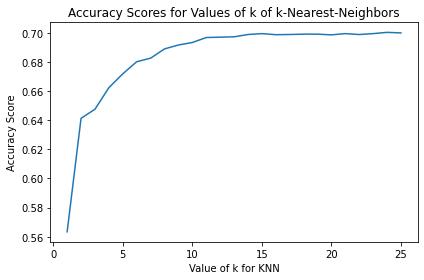

In [ ]:
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.tight_layout()
plt.show()

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=3) #konfigurasi algoritma
model_knn.fit(X_train,y_train) #training modek/classifier
y_pred = model_knn.predict(X_test) #melakukan prediksi

In [ ]:
#accuracy score
print(accuracy_score(y_test, y_pred)) #evaluasi akurasi

0.647532975085491


In [ ]:
#confusion matrix
print(confusion_matrix(y_test, y_pred)) #evaluasi confusion matrix

[[4160  513   52 ...    0    0    0]
 [1158 1113   70 ...    0    0    0]
 [ 303  223   26 ...    0    0    0]
 ...
 [   1    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]


In [ ]:
#classification report
print(classification_report(y_test, y_pred)) #evaluasi klasifikasi

              precision    recall  f1-score   support

           0       0.70      0.88      0.78      4744
           1       0.56      0.47      0.51      2354
           2       0.15      0.05      0.07       559
           3       0.08      0.02      0.03       190
           4       0.00      0.00      0.00       100
           5       0.00      0.00      0.00        62
           6       0.00      0.00      0.00        40
           7       0.00      0.00      0.00        27
           8       0.00      0.00      0.00        20
           9       0.00      0.00      0.00        10
          10       0.00      0.00      0.00        14
          11       0.00      0.00      0.00         6
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         7
          14       0.00      0.00      0.00         6
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         5
          17       0.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#logistic regression (LR)
from sklearn.linear_model import LogisticRegression

In [ ]:
#model_logreg = LogisticRegression()
model_logreg = LogisticRegression(solver='lbfgs', multi_class='auto')
model_logreg.fit(X_train,y_train)
y_pred = model_logreg.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#accuracy score
print(accuracy_score(y_test, y_pred))

0.5790180752320468


In [ ]:
#confusion matrix
print(confusion_matrix(y_test, y_pred))

[[4733    7    4 ...    0    0    0]
 [2345    5    4 ...    0    0    0]
 [ 553    3    3 ...    0    0    0]
 ...
 [   1    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]]


In [ ]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      1.00      0.73      4744
           1       0.17      0.00      0.00      2354
           2       0.17      0.01      0.01       559
           3       0.00      0.00      0.00       190
           4       0.00      0.00      0.00       100
           5       0.00      0.00      0.00        62
           6       0.00      0.00      0.00        40
           7       0.00      0.00      0.00        27
           8       0.00      0.00      0.00        20
           9       0.00      0.00      0.00        10
          10       0.00      0.00      0.00        14
          11       0.00      0.00      0.00         6
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         7
          14       0.00      0.00      0.00         6
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         5
          17       0.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#support vector classifier (Model SVM)
from sklearn.svm import SVC

In [ ]:
#model_svc - SVC()
model_svc = SVC(gamma='scale')
model_svc.fit(X_train,y_train)
y_pred = model_svc.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))

0.5793844650708354


In [ ]:
print(confusion_matrix(y_test, y_pred))

[[4744    0    0 ...    0    0    0]
 [2354    0    0 ...    0    0    0]
 [ 559    0    0 ...    0    0    0]
 ...
 [   1    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      1.00      0.73      4744
           1       0.00      0.00      0.00      2354
           2       0.00      0.00      0.00       559
           3       0.00      0.00      0.00       190
           4       0.00      0.00      0.00       100
           5       0.00      0.00      0.00        62
           6       0.00      0.00      0.00        40
           7       0.00      0.00      0.00        27
           8       0.00      0.00      0.00        20
           9       0.00      0.00      0.00        10
          10       0.00      0.00      0.00        14
          11       0.00      0.00      0.00         6
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         7
          14       0.00      0.00      0.00         6
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         5
          17       0.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#decision tree classifier (DT)
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
y_pred = model_dt.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))

0.8605276013678554


In [ ]:
print(confusion_matrix(y_test, y_pred))

[[4441  271   15 ...    0    0    0]
 [ 307 1906  124 ...    0    0    0]
 [  28   90  407 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      4744
           1       0.83      0.81      0.82      2354
           2       0.71      0.73      0.72       559
           3       0.74      0.74      0.74       190
           4       0.56      0.63      0.59       100
           5       0.66      0.53      0.59        62
           6       0.56      0.57      0.57        40
           7       0.38      0.41      0.39        27
           8       0.32      0.30      0.31        20
           9       0.25      0.50      0.33        10
          10       0.55      0.43      0.48        14
          11       0.00      0.00      0.00         6
          12       0.67      0.40      0.50         5
          13       0.00      0.00      0.00         7
          14       0.00      0.00      0.00         6
          15       0.00      0.00      0.00         3
          16       0.33      0.40      0.36         5
          17       0.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
#random forest classifier 
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#model_rf = RandomForestClassifier()
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train,y_train)
pred_rf = model_rf.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))

0.8605276013678554


In [ ]:
print(confusion_matrix(y_test, y_pred))

[[4441  271   15 ...    0    0    0]
 [ 307 1906  124 ...    0    0    0]
 [  28   90  407 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      4744
           1       0.83      0.81      0.82      2354
           2       0.71      0.73      0.72       559
           3       0.74      0.74      0.74       190
           4       0.56      0.63      0.59       100
           5       0.66      0.53      0.59        62
           6       0.56      0.57      0.57        40
           7       0.38      0.41      0.39        27
           8       0.32      0.30      0.31        20
           9       0.25      0.50      0.33        10
          10       0.55      0.43      0.48        14
          11       0.00      0.00      0.00         6
          12       0.67      0.40      0.50         5
          13       0.00      0.00      0.00         7
          14       0.00      0.00      0.00         6
          15       0.00      0.00      0.00         3
          16       0.33      0.40      0.36         5
          17       0.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
#accuracy comparison for various models.
models = [model_knn, model_logreg, model_svc, model_dt, model_rf]
accuracy_scores = []
for model in models:
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_scores.append(accuracy)

print(accuracy_scores)

[0.647532975085491, 0.5790180752320468, 0.5793844650708354, 0.8605276013678554, 0.8696873473375671]


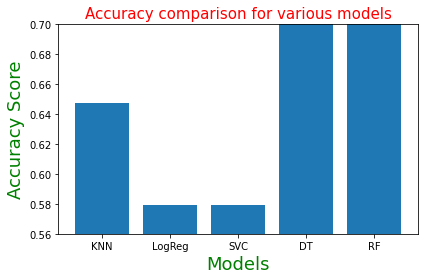

In [ ]:
plt.bar(['KNN', 'LogReg', 'SVC', 'DT', 'RF'],accuracy_scores)
plt.ylim(0.56,0.70)
plt.title('Accuracy comparison for various models', fontsize=15, color='r')
plt.xlabel('Models', fontsize=18, color='g')
plt.ylabel('Accuracy Score', fontsize=18, color='g')
plt.tight_layout()
plt.show()